#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

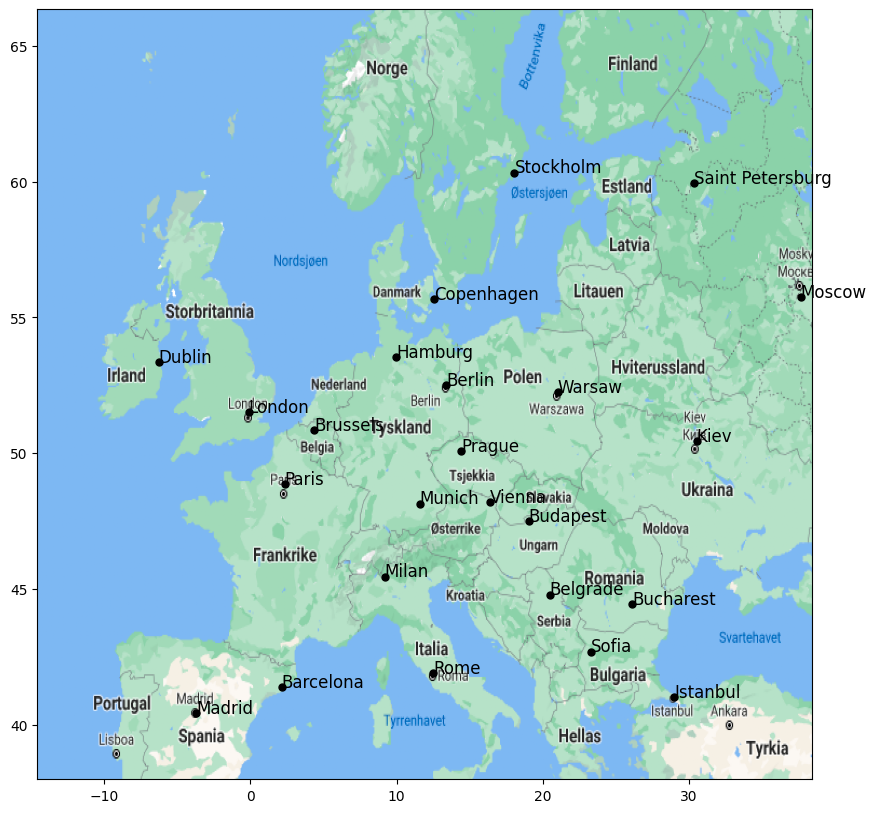

In [7]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)

In [8]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


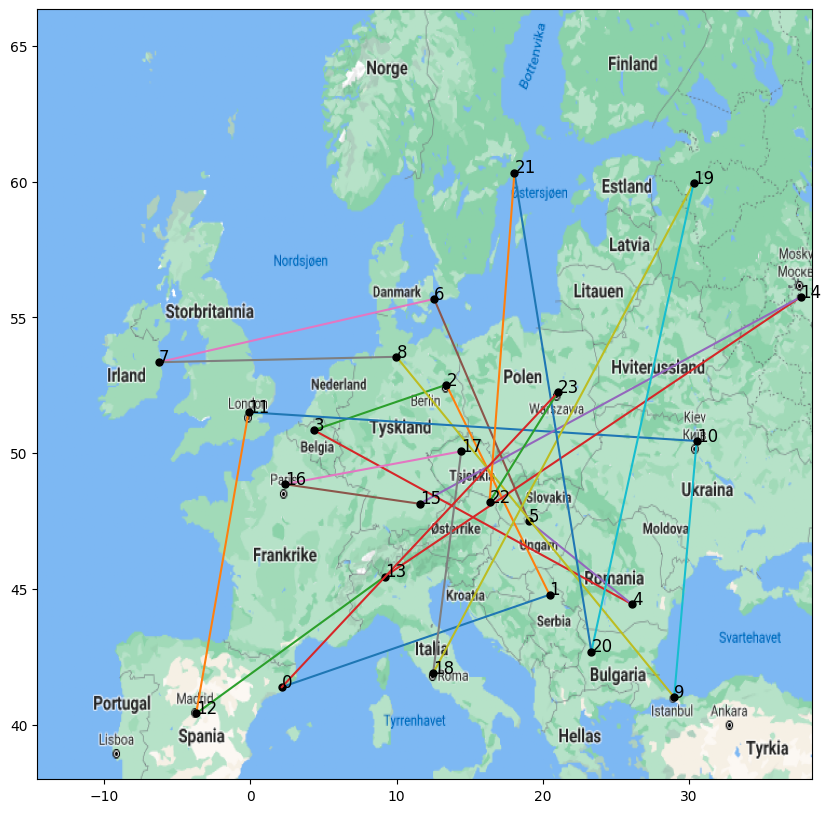

In [9]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

for løkke kjørt:  6 ganger.
Tid brukt på å finne optimal lengde av 6 byer 0.0039899349212646484
for løkke kjørt:  7 ganger.
Tid brukt på å finne optimal lengde av 7 byer 0.025396347045898438
for løkke kjørt:  8 ganger.
Tid brukt på å finne optimal lengde av 8 byer 0.20427799224853516
for løkke kjørt:  9 ganger.
Tid brukt på å finne optimal lengde av 9 byer 2.117687225341797
for løkke kjørt:  10 ganger.
Tid brukt på å finne optimal lengde av 10 byer 23.909367561340332
['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']


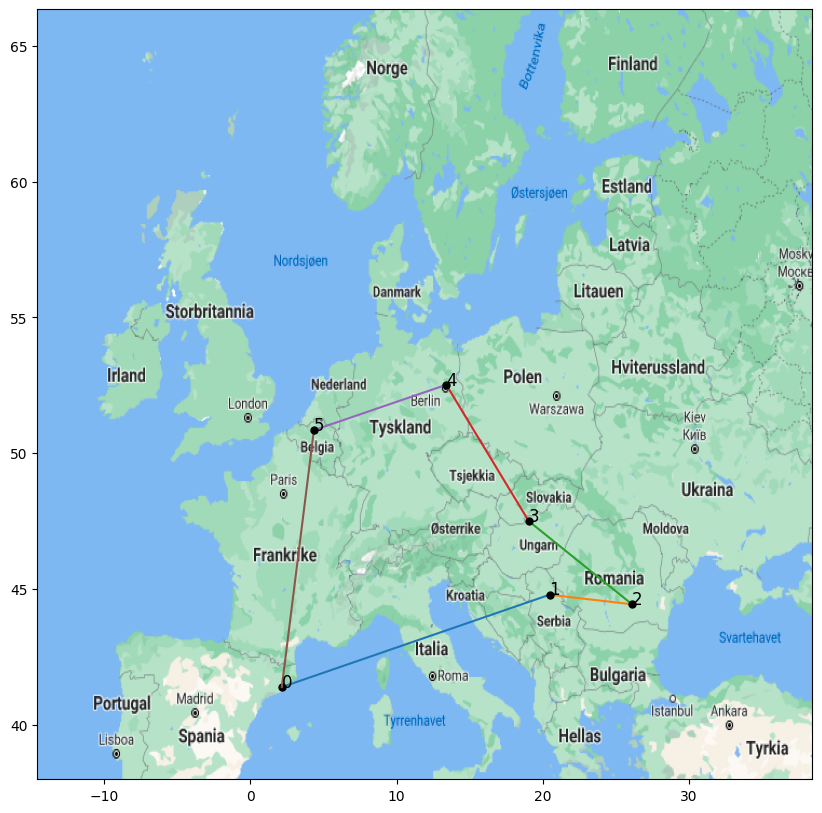

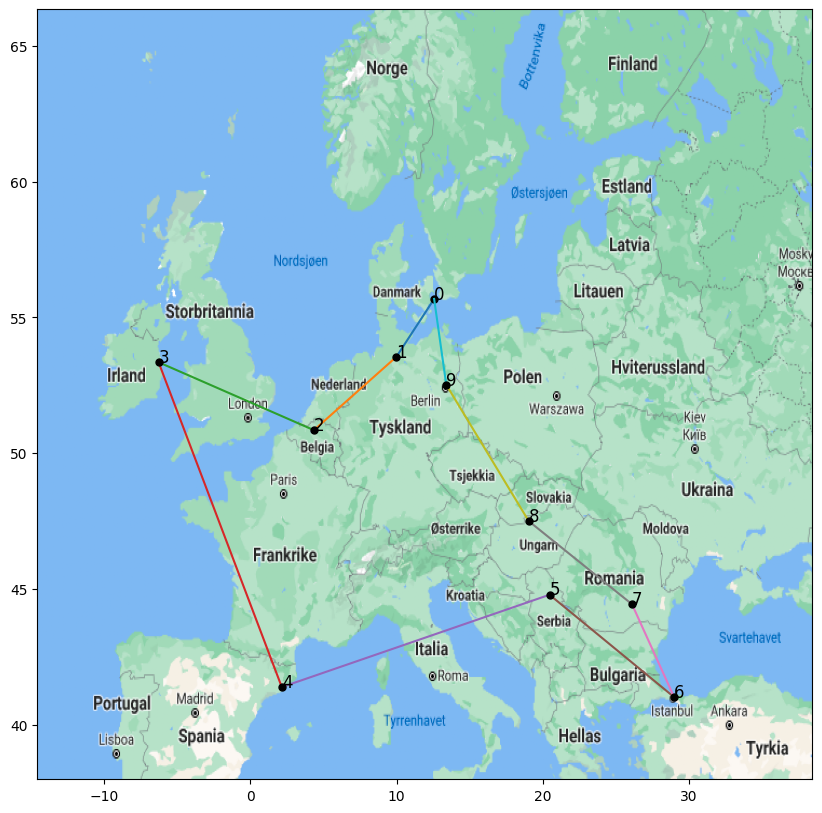

In [10]:
# Implement the algorithm here

import csv
import random
from itertools import permutations
import statistics
from sys import maxsize
import time
import numpy

with open("european_cities.csv", "r") as fil:
    data = list(csv.reader(fil, delimiter=";")) #lese filen
    byer = data[0] #navn på byene
    distanser = data[1:] #distansen mellom byer

for distans in distanser:
    for i in range(len(distans)):
        distans[i] = float(distans[i])

distanser = numpy.array(distanser)

#Metode som skal kalkulere distansen mellom byene og holde styr på dette
def kalkuler_distanse(tur_mellom_byer):
    s = 0
    lengde = len(tur_mellom_byer)-1
    i = 0
    
    while (lengde > i):
        s += distanser[tur_mellom_byer[i], tur_mellom_byer[i+1]] #legger til fra starten til slutten
        i += 1
    s += distanser[tur_mellom_byer[-1], tur_mellom_byer[0]]
    return s

def exhaustive_search(cities):
    liste_av_byer = list(cities)
    best = liste_av_byer[0] #setter første til å være beste utfall
    iterasjoner = 0
    #For loop som skal sjekke hvilke tur som har kortest distanse.
    for tur in liste_av_byer:
        iterasjoner += 1
        if kalkuler_distanse(best) > kalkuler_distanse(tur):
            best = tur #om kortere distanse blir funnet bytter om
    best = [byer[i] for i in best]
    print("for løkke kjørt: ", i, "ganger.")
    return best

løsninger = []
nm_av_byer = []

for i in range(6,11):
    nm_av_byer.append(permutations(range(i)))
    start = nm_av_byer[-1]
    start_tid = time.time()

    løsninger.append(exhaustive_search(start))

    slutt_tid = time.time()
    print("Tid brukt på å finne optimal lengde av", i, "byer", slutt_tid-start_tid)

print(løsninger[0])
plot_plan(løsninger[0])
plot_plan(løsninger[-1])


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [11]:
# Answer
'''
Om vi har Barcelona på index 0 (A), 1 er da Belgrade (B), fram til 10 som er J.

Da blir distansen på korteste turen for 10 byer: 7486.309999999999. 
'''
ti_byer = [byer.index(i) for i in løsninger[-1]]
tiByer = [byer[i] for i in ti_byer]

distanse_mellom_ti_byer = kalkuler_distanse(ti_byer)
print("Totale distansen reist mellom de ti første byene:", distanse_mellom_ti_byer)
print("Den optimale ruten mellom ti byer:", tiByer)

Totale distansen reist mellom de ti første byene: 7486.309999999999
Den optimale ruten mellom ti byer: ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


For å finne ut sånn ca. hvor lang tid det vil ta for å finne en løsning på alle 24 byer med exhaustive search, kan vi berenge tiden, ved å beregne tiden. For å finne løsningen på 6,7,8 byer gikk det ganske fort, gjennomsnittlig 0.5 sekunder, mens på den 9. da tok det lenger tid og 10 byen tok enda mer lenger tid, sånn ca. 5 ganger mer. Så hvis man tenker at 10 byer bruker 5 sekunder. Da for 24 byer blir regnestykke: (5 * 10^14)*86400 dager = 15844043.9 år.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

Resultat for 10 byer

Beste distance:
Korteste rutens distanse: 7486.3099999999995 
Korteste ruten ['Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg']


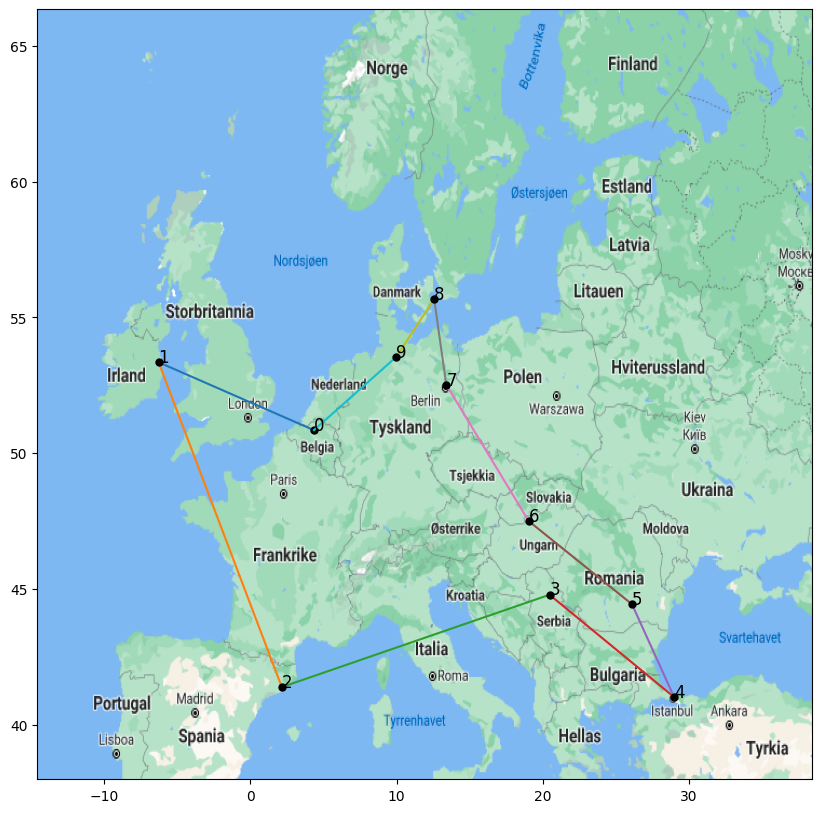

Mean distance:  7949.575555555555

Worst distance:
Verste rutens distanse: 8419.09 
Verste ruten ['Belgrade', 'Istanbul', 'Bucharest', 'Hamburg', 'Brussels', 'Barcelona', 'Dublin', 'Copenhagen', 'Berlin', 'Budapest']


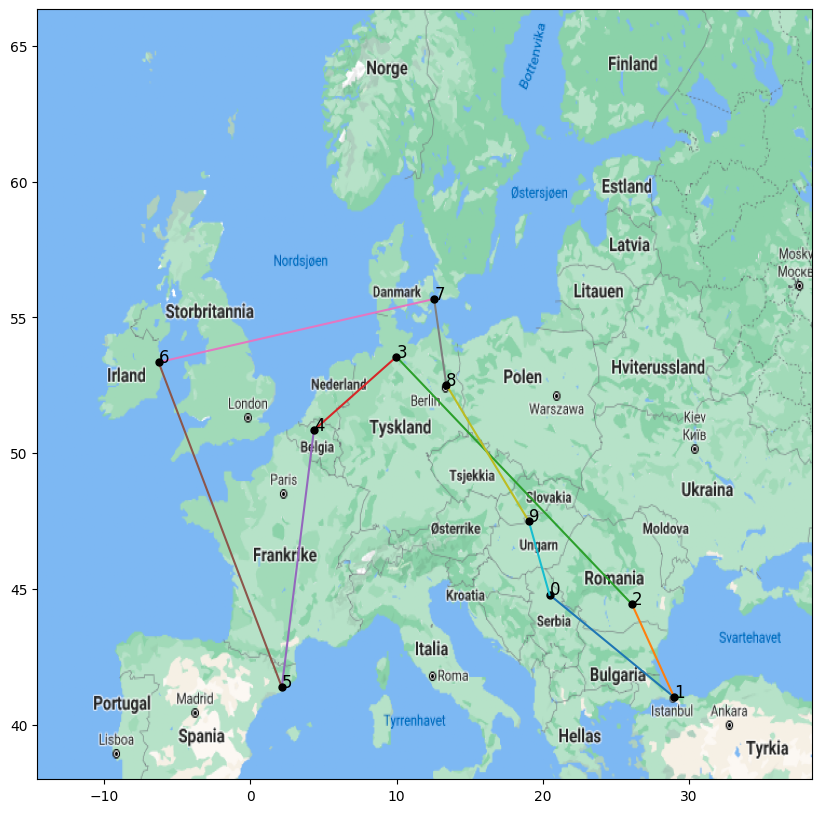

Tid brukt på å finne ruten for 10 byer 0.20836949348449707
Resultat for alle 24 byer

Beste distance:
Korteste rutens distanse: 12576.56 
Korteste ruten ['Paris', 'Brussels', 'Hamburg', 'Prague', 'Warsaw', 'Berlin', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 'Moscow', 'Kiev', 'Bucharest', 'Istanbul', 'Sofia', 'Belgrade', 'Budapest', 'Vienna', 'Munich', 'Milan', 'Rome', 'Barcelona', 'Madrid', 'Dublin', 'London']


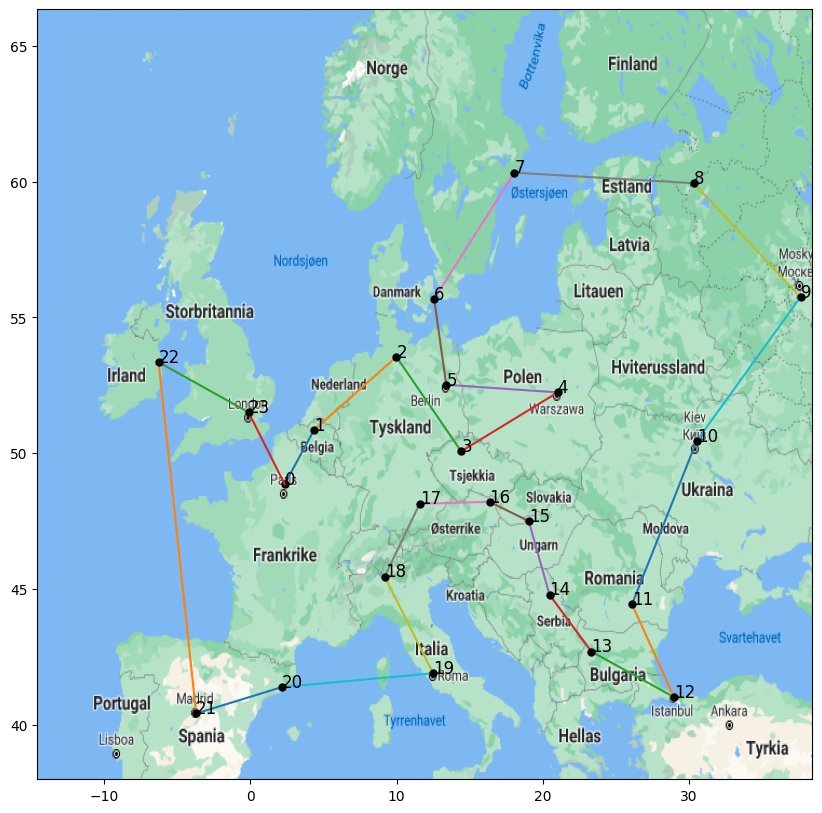

Mean distance:  14196.696

Worst distance:
Verste rutens distanse: 16258.94 
Verste ruten ['Istanbul', 'Bucharest', 'Kiev', 'Warsaw', 'Vienna', 'Budapest', 'Belgrade', 'Rome', 'Milan', 'Munich', 'Paris', 'Brussels', 'Hamburg', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 'Moscow', 'Berlin', 'Prague', 'Barcelona', 'Madrid', 'Dublin', 'London', 'Sofia']


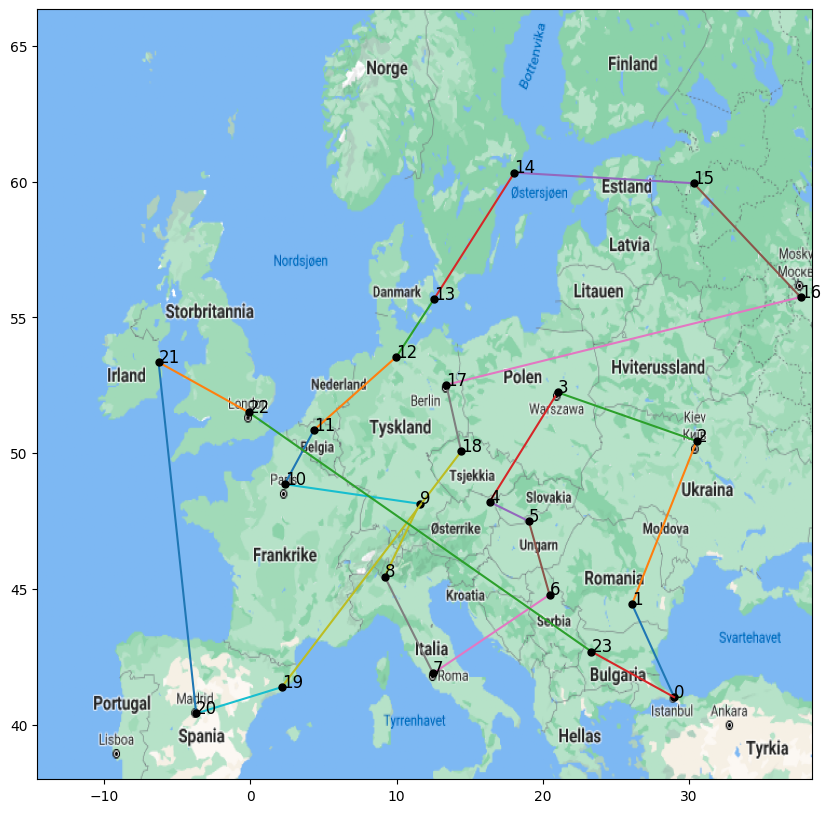

Tid brukt på å finne ruten for 24 byer 1.0615122318267822


In [12]:
# Implement the algorithm here
import random

# Metode som kjører gjennom en tur og kalkulerer distanse
def distanse(kombListe):
    lenListe = len(kombListe)
    #Starter med 0
    distanse_sum = 0

    for k in range(lenListe-1):
        c1 = data[0].index(kombListe[k])
        c2 = data[0].index(kombListe[k+1])
        distanser = data[1:]
        distanse = distanser[c1][c2]
        distanse_sum += float(distanse)

    første = data[0].index(kombListe[0])
    siste = data[0].index(kombListe[-1])
    siste_distanse = data[1:][siste][første]
    distanse_sum += siste_distanse

    return distanse_sum
            
def henteByer(byer):
    return data[0][0:byer]


#Metod som randomly bytter 2 byer, for å få nabo sin rute
def rand_swap(turListe):
    x = range(len(turListe))

    c1, c2 = random.sample(x, 2)
    turListe[c1],turListe[c2] = turListe[c2], turListe[c1]
    

    return turListe

def hill_climbing(ant_byer):
    #setter en random tur til å være den korteste
    korteste_tur = random.sample(ant_byer, len(ant_byer))
    korteste_distnas = distanse(korteste_tur)

    if len(korteste_tur) > 1:
        i = 0
        #sammenlikne med naboer sine løsninger helt til det ikke finnes no bedre løsning
        while i <= 1000:
            kopi = korteste_tur.copy()
            ny_tur = rand_swap(kopi)
            ny_distanse = distanse(ny_tur)

            #Om korteste distansen er større en ny distanse, bytte om på de.
            if korteste_distnas > ny_distanse:
                korteste_tur = ny_tur
                korteste_distnas = ny_distanse
                i = 0

            else:
                i += 1
    # print(korteste_tur, korteste_distnas)
    return korteste_distnas, korteste_tur

def kjor10():
    print("Resultat for 10 byer\n")
    ant_byer = henteByer(10)
    løsninger = []
    løsninger1 = {}
    start = time.time()
    for i in range(20):
        resultat_D, resultat_T = hill_climbing(ant_byer)
        løsninger1[resultat_D] = resultat_T
        # løsninger.append(resultat_T)
    slutt = time.time()
    kjøretid = slutt-start
    sortert_løsning = dict(sorted(løsninger1.items()))
    print("Beste distance:")
    print("Korteste rutens distanse:", list(sortert_løsning.keys())[0], "\nKorteste ruten", list(sortert_løsning.values())[0])
    # print(resultat_T, resultat_D)
    # print(løsninger1)
    plot_plan(list(sortert_løsning.values())[0])

    meanDist = statistics.mean(sortert_løsning)
    print("Mean distance: ", meanDist)

    print("\nWorst distance:")
    print("Verste rutens distanse:", list(sortert_løsning.keys())[-1], "\nVerste ruten", list(sortert_løsning.values())[-1])
    # print(resultat_T, resultat_D)
    # print(løsninger1)
    plot_plan(list(sortert_løsning.values())[-1])
    print(f"Tid brukt på å finne ruten for {len(ant_byer)} byer {kjøretid}")

def kjor24():
    print("Resultat for alle 24 byer\n")
    ant_byer = henteByer(24)
    løsninger = []
    løsninger1 = {}
    start = time.time()
    for i in range(20):
        resultat_D, resultat_T = hill_climbing(ant_byer)
        løsninger1[resultat_D] = resultat_T
        # løsninger.append(resultat_T)
    slutt = time.time()
    kjøretid = slutt-start

    sortert_løsning = dict(sorted(løsninger1.items()))
    print("Beste distance:")
    print("Korteste rutens distanse:", list(sortert_løsning.keys())[0], "\nKorteste ruten", list(sortert_løsning.values())[0])
    # print(resultat_T, resultat_D)
    # print(løsninger1)
    plot_plan(list(sortert_løsning.values())[0])

    meanDist = statistics.mean(sortert_løsning)
    print("Mean distance: ", meanDist)

    print("\nWorst distance:")
    print("Verste rutens distanse:", list(sortert_løsning.keys())[-1], "\nVerste ruten", list(sortert_løsning.values())[-1])
    # print(resultat_T, resultat_D)
    # print(løsninger1)
    plot_plan(list(sortert_løsning.values())[-1])
    print(f"Tid brukt på å finne ruten for {len(ant_byer)} byer {kjøretid}")
    
    
def main():
    kjor10()
    kjor24()

main()




## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

-------------For 10 byer-------------

Den korteste turen var: ['Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade'] . Med distanse på: 7486.3099999999995


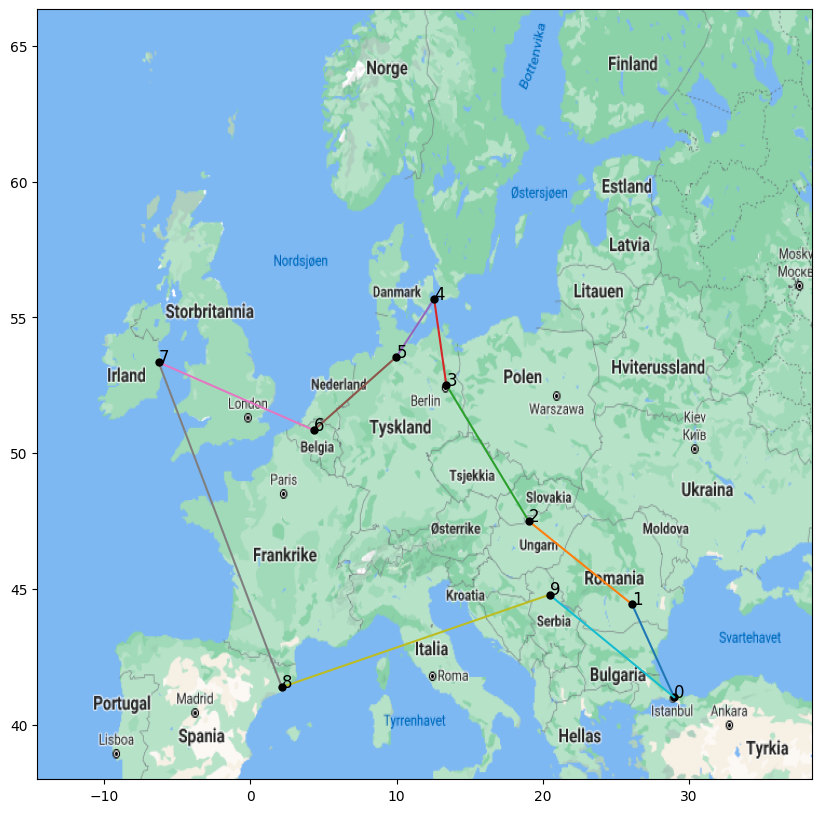

Den verste turen var med distanse på: 7486.3099999999995
Tiden det tok på finne dette med genetic algorithm: 12.732978582382202
-------------For 24 byer-------------

Den korteste turen var: ['Prague', 'Vienna', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul', 'Sofia', 'Rome', 'Milan', 'Barcelona', 'Madrid', 'Paris', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Munich', 'London', 'Dublin', 'Stockholm', 'Saint Petersburg', 'Moscow', 'Kiev', 'Warsaw'] . Med distanse på: 12752.810000000001


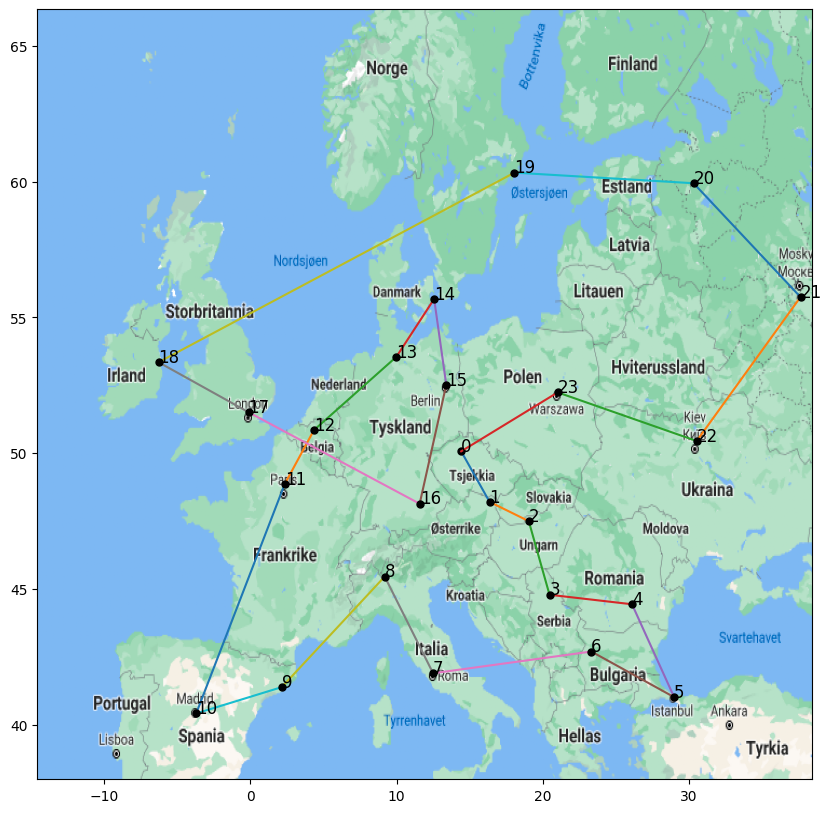

Den verste turen var med distanse på: 14412.600000000002
Tiden det tok på finne dette med genetic algorithm: 29.534891843795776


In [71]:
#pmx og pmx_pair henta fra weekly excercises
import numpy as np
import random
import math
import time

#Hjelpe Metode som tar koordinater og gir tilbake en dict av byer.
#Går igjennom hele lista av byer med kordinater og gir tilbake dict med byene og dems kordinater
def dictOverByer(bk, antall):
    byDict = {}
    for by in bk:
        if antall == 0:
            break
        byDict[by] = bk[by]
        antall -= 1
    return byDict

def beregne(heleTur):
    total = 0
    for x in range(len(heleTur)):
        total += distanse(heleTur[x])




# Metode som finner den korteste veien mellom byene 
# Tar inn bk: bykordinatene, pop_size: størelse på population, mut_rate: mutasjoner og generatio.
def genetic_algortihm(city_coords, population_size, mutation_rate=0.4, generations=100):
    byer = list(city_coords.keys())
    byliste_lengde = len(byer)
    populasjon = [random.sample(byer, byliste_lengde) for i in range(population_size)] #liste med turer for randomme byer
    for generation in range(generations):
        fitness = [1 / distanse(path) for path in populasjon] #beregner distanse for hver tur. ved å dele kan man gjøre slik at de kortere veiene får høyere verdi. (for etterpå)
        fitness_sum = sum(fitness)
        fitnessNorm = [f / fitness_sum for f in fitness]
        new_population = []
        highestFitness = max(fitnessNorm) # lagrer den beste turen hittil
        best_individual = populasjon[fitnessNorm.index(highestFitness)]
        #For loop som velger ut to tilfeldige turer fra pop lista, og gir tilbake en liste
        for i in range(population_size):
            if random.random() < mutation_rate:
                path1, path2 = random.choices(populasjon, fitnessNorm, k=2)
                path = crossover(path1, path2)
                path = mutasjon(path)
                new_population.append(path) #Legger den nye turen mellom to byene inn i nye lista med pop.
            else:
                path1, path2 = random.choices(populasjon, fitnessNorm, k=2)
                new_population.append(crossover(path1, path2))
        worst_fitness = min(fitness)
        if 1 / distanse(best_individual) > worst_fitness:
            new_population[new_population.index(min(new_population, key=lambda x: 1 / distanse(x)))] = best_individual
        populasjon = new_population
    best_path = min(populasjon, key=lambda x: distanse(x))
    return best_path

#Metode som kjører crossover
def crossover(tur1, tur2):
    point = random.randint(0, len(tur1)-1)
    
    if point == 0:
        return min(tur1, tur2, key=lambda x: distanse(x))
    else:
        slutt2 = tur2[point:] #slutten av vei 2
        slutt1 = tur1[point:] #slutten av vei 1

        #beregne distansen for veiene
        dist2 = distanse(tur2[:point])
        dist1 = distanse(tur1[:point])

        if dist1 > dist2:
            tur = tur2[:point]
        else: 
            tur = tur1[:point]

        if len(slutt1) !=0 and len(slutt2) != 0:
            if distanse(slutt2) > distanse(slutt1):
                for by in tur1:
                    if by not in tur:
                        tur.append(by)
                return tur
            
        for by in tur2:
            if by not in tur:
                tur.append(by)
        return tur
    
#Metode som muterer en tur
def mutasjon(tur):
    by1, by2 = random.sample(range(len(tur)), 2)
    tur[by1], tur[by2] = tur[by2], tur[by1]
    return tur

            


timeList = []
distList = []
# mutasjon_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
# pop_size = [50, 150, 300]

def kjor10gen():
    beste_tur = None
    beste_distanse = 0
    verste_distanse = 0
    print("-------------For 10 byer-------------\n")
    start_tid = time.time()
    turen = []

    for x in range(20):
        tur = genetic_algortihm(dictOverByer(city_coords, 10), 150)
        turen.append(tur)
        # print(turen)
        # print(x)
        
        if x == 0:
            beste_distanse = distanse(tur)
            # print(beste_distanse)
            verste_distanse = distanse(tur)
            # print(verste_distanse)
        else:
            if distanse(tur) < beste_distanse:
                beste_distanse = distanse(tur)
                beste_tur = tur
        beste_tur = tur

                

    slutt_tid = time.time()
    beregne(turen)
    print("Den korteste turen var:", beste_tur, ". Med distanse på:", beste_distanse)
    plot_plan(beste_tur)
    print("Den verste turen var med distanse på:", verste_distanse)
    
    print("Tiden det tok på finne dette med genetic algorithm:", slutt_tid-start_tid)

def kjor24gen():
    beste_tur = None
    beste_distanse = 0
    verste_distanse = 0
    print("-------------For 24 byer-------------\n")
    start_tid = time.time()
    turen = []

    for x in range(20):
        tur = genetic_algortihm(dictOverByer(city_coords, 24), 150)
        turen.append(tur)
        # print(turen)
        # print(x)
        
        if x == 0:
            beste_distanse = distanse(tur)
            # print(beste_distanse)
            verste_distanse = distanse(tur)
            # print(verste_distanse)
        else:
            if distanse(tur) < beste_distanse:
                beste_distanse = distanse(tur)
                beste_tur = tur
        beste_tur = tur

                

    slutt_tid = time.time()
    beregne(turen)
    print("Den korteste turen var:", beste_tur, ". Med distanse på:", beste_distanse)
    plot_plan(beste_tur)
    print("Den verste turen var med distanse på:", verste_distanse)
    
    print("Tiden det tok på finne dette med genetic algorithm:", slutt_tid-start_tid)


kjor10gen()
kjor24gen()

# Fant ut at mutation rate som ga best resultat var 0.4, fikk den korteste distansen da.

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [73]:
# Answer
"""
De 10 første byene ble funnet med en distanse på 7486,309. Dette var akkurat samme som exhaustive search.

Genetic Algorithm brukte 12,7 sek på å finne korteste veien for 10 byer, mens exhaustive search gjorde dette på 23 sek, så genetic var mye raskere
Genetic Algorithm brukte 29,5 sek på å finne korteste veien for 24 byer mens exhaustive search hadde brukt mye mer tid på dette.

Altså var genetic mye raskere og bedre til å finne de korteste veiene.

Klarte ikke helt å få med hvor mange turer det tok for genetic algorithm.
"""

"""
NB: Jeg har brukt ChatGPT til å forstå de forskjellige algoritmene som referanse, men all koden er skrevet og implentert av meg. Har tatt eksempler fra ChatGPT
og endret til min egen kode. All koden er testet og kjører på min maskin.
"""


'\nNB: Jeg har brukt ChatGPT til å forstå de forskjellige algoritmene som referanse, men all koden er skrevet og implentert av meg. Har tatt eksempler fra ChatGPT\nog endret til min egen kode. All koden er testet og kjører på min maskin.\n'

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
# Implement algorithm here